In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [10]:
df = pd.read_csv('run_search_output.csv')

In [11]:
df

,problem,algo,action,nodes_expanded,goal_test,new_nodes,plan_length,time_to_run,time_run_pypy
0,1,breadth_first_search,20,43,56,178,6,0.006867,0.032478
1,1,depth_first_graph_search,20,21,22,84,20,0.005211,0.007989
2,1,uniform_cost_search,20,60,62,240,6,0.013549,0.019776
3,1,greedy_best_first_graph_search with h_unmet_goals,20,7,9,29,6,0.001590,0.003040
4,1,greedy_best_first_graph_search with h_pg_levelsum,20,6,8,28,6,0.643192,0.668640
5,1,greedy_best_first_graph_search with h_pg_maxlevel,20,6,8,24,6,0.375530,0.187120
6,1,greedy_best_first_graph_search with h_pg_setlevel,20,6,8,28,6,0.627370,0.514928
7,1,astar_search with h_unmet_goals,20,50,52,206,6,0.009225,0.015860
8,1,astar_search with h_pg_levelsum,20,28,30,122,6,1.589226,0.267637
9,1,astar_search with h_pg_maxlevel,20,43,45,180,6,1.448989,0.209042


In [14]:
pivot = pd.pivot_table(df, 'nodes_expanded', 'algo', 'action')
pivot

action,20,72,88,104
algo,,,,
astar_search with h_pg_levelsum,28,357,369,1208
astar_search with h_pg_maxlevel,43,2887,9580,62077
astar_search with h_pg_setlevel,33,1037,3423,22606
astar_search with h_unmet_goals,50,2467,7388,34330
breadth_first_search,43,3343,14663,99736
depth_first_graph_search,21,624,408,25174
greedy_best_first_graph_search with h_pg_levelsum,6,9,14,17
greedy_best_first_graph_search with h_pg_maxlevel,6,27,21,56
greedy_best_first_graph_search with h_pg_setlevel,6,9,35,107


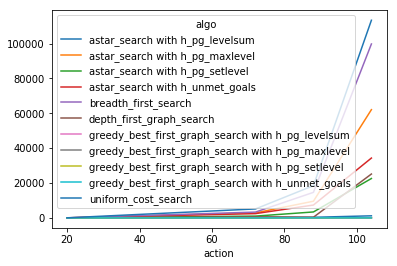

In [22]:
pivot2.plot()

In [16]:
pivot2 = pd.pivot_table(df, 'nodes_expanded', 'action', 'algo')

actions = pivot2.index.get_level_values(0).unique()
actions
for act in actions:
    split=pivot2.xs(act)

#     rain=split["rain(mm)"]
#     temp=split["temp(dC)"]

#     plt.subplots()
#     temp.plot(kind="line",color="r",).legend()
#     rain.plot(kind="bar").legend()

Int64Index([20, 72, 88, 104], dtype='int64', name='action')

In [17]:
pivot2.xs(20)

algo
astar_search with h_pg_levelsum                      28
astar_search with h_pg_maxlevel                      43
astar_search with h_pg_setlevel                      33
astar_search with h_unmet_goals                      50
breadth_first_search                                 43
depth_first_graph_search                             21
greedy_best_first_graph_search with h_pg_levelsum     6
greedy_best_first_graph_search with h_pg_maxlevel     6
greedy_best_first_graph_search with h_pg_setlevel     6
greedy_best_first_graph_search with h_unmet_goals     7
uniform_cost_search                                  60
Name: 20, dtype: int64

In [7]:
algo_index = df.set_index(['algo', 'action']).sort_index()
algo_index

problem  \
algo                                              action            
astar_search with h_pg_levelsum                   20.0          1   
                                                  72.0          2   
                                                  88.0          3   
                                                  104.0         4   
astar_search with h_pg_maxlevel                   20.0          1   
                                                  72.0          2   
                                                  88.0          3   
                                                  NaN           4   
astar_search with h_pg_setlevel                   20.0          1   
                                                  72.0          2   
                                                  88.0          3   
                                                  NaN           4   
astar_search with h_unmet_goals                   20.0          1   
                                                  72.0          2   
                                                  88.0          3   
                                                  104.0         4   
breadth_first_search                              20.0          1   
                                                  72.0          2   
                                                  88.0          3   
                                                  104.0         4   
depth_first_graph_search                          20.0          1   
                                                  72.0          2   
                                                  88.0          3   
                                                  104.0         4   
greedy_best_first_graph_search with h_pg_levelsum 20.0          1   
                                                  72.0          2   
                                                  88.0          3   
                                                  104.0         4   
greedy_best_first_graph_search with h_pg_maxlevel 20.0          1   
                                                  72.0          2   
                                                  88.0          3   
                                                  104.0         4   
greedy_best_first_graph_search with h_pg_setlevel 20.0          1   
                                                  72.0          2   
                                                  88.0          3   
                                                  104.0         4   
greedy_best_first_graph_search with h_unmet_goals 20.0          1   
                                                  72.0          2   
                                                  88.0          3   
                                                  104.0         4   
uniform_cost_search                               20.0          1   
                                                  72.0          2   
                                                  88.0          3   
                                                  104.0         4   

                                                          nodes_expanded  \
algo                                              action                   
astar_search with h_pg_levelsum                   20.0              28.0   
                                                  72.0             357.0   
                                                  88.0             369.0   
                                                  104.0           1208.0   
astar_search with h_pg_maxlevel                   20.0              43.0   
                                                  72.0            2887.0   
                                                  88.0            9580.0   
                                                  NaN                NaN   
astar_search with h_pg_setlevel                   20.0              33.0   
                                               